In [10]:
# clone github with persistence-based clustering code
! git clone https://github.com/LuisScoccola/gamma-linkage.git

fatal: destination path 'gamma-linkage' already exists and is not an empty directory.


In [11]:
# necessary imports

import sys
sys.path.append("gamma-linkage")
from linkage.linkage import *
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from urllib.request import urlopen
from io import BytesIO
sys.setrecursionlimit(3000)

In [12]:
# define functions we will need (you may ignore this)

def PDdensityFilteredRipsGraph(data, kernel_bandwidth, rips_scale, y_max = None) :
  # outputs persistence diagram of rips graph filtered by KDE
  x = MPSpace(data)
  x.fit(kernel='epanechnikov')
  gamma = Gamma_curve.constant_s_t_k_indexed(kernel_bandwidth, rips_scale)
  hc = x.gamma_linkage(gamma)
  pd = hc.PD()[0]
  pd = np.array(list(map(lambda t : [t[0],np.abs(t[1]-t[0])], pd )))

  plt.figure(figsize=(3,3))
  if y_max is not None :
    plt.ylim([0,y_max])
  plt.xlabel("Birth")
  plt.ylabel("Lifetime")
  plt.locator_params(axis="y", nbins=20)
  plt.scatter(pd[:,0],pd[:,1], s = 10)
  plt.grid(axis='y')
  plt.show()

def clusteringDensityFilteredRipsGraph(data, kernel_bandwidth, rips_scale, persistence_threshold) :
  # outputs clustering of rips graph filtered by KDE, with a certain persistence threshold
  x = MPSpace(data)
  x.fit(kernel='epanechnikov')
  gamma = Gamma_curve.constant_s_t_k_indexed(kernel_bandwidth, rips_scale)
  hc = x.gamma_linkage(gamma)
  return hc.persistence_based_flattening(threshold=persistence_threshold)[1]

def plotDataset(data,clustering=None):
  # plots a dataset and optionally colors by clustering
  _ = plt.figure()
  fig1, ax1 = plt.subplots() ; _ = fig1.set_figheight(3) ; _ = fig1.set_figwidth(4)
  _ = plt.locator_params(axis="x", nbins=10)
  _ = plt.locator_params(axis="y", nbins=10)
  if clustering is not None:
    _ = plt.scatter(data.T[0], data.T[1], s=5, alpha = 0.3, c = -clustering, cmap="Accent")
  else :
    _ = plt.scatter(data.T[0], data.T[1], s=5, alpha = 0.3, cmap="Accent")
  _ = plt.show()

# Dataset 1


<Figure size 432x288 with 0 Axes>

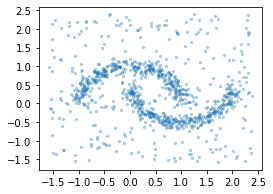

In [13]:
# generate first dataset

n_true_points = int(1000 * 0.7) ; data1, _ = datasets.make_moons(n_samples=n_true_points, noise=0.1, random_state=0)
np.random.seed(0) ; n_noise = 1000 - n_true_points ; noise = (np.random.random_sample((n_noise,2)) - 0.4) * 4 ; data1 = np.vstack((data1,noise))

plotDataset(data1)


Find values for [KERNEL_BANDWIDTH] and [RIPS_SCALE] such that the persistence diagram below seems adequate.

In [14]:
# uncomment and fill in!

# KERNEL_BANDWIDTH = ...
# RIPS_SCALE = ...

# PDdensityFilteredRipsGraph(data1, KERNEL_BANDWIDTH,RIPS_SCALE)

Find a value for [PERSISTENCE_THRESHOLD] looking at the persistence diagram above and make sure it produces a reasonable clustering of the data.

In [15]:
# uncomment and fill in!

#PERSISTENCE_THRESHOLD = ...

#c = clusteringDensityFilteredRipsGraph(data1, KERNEL_BANDWIDTH,RIPS_SCALE,PERSISTENCE_THRESHOLD)

#plotDataset(data1,clustering=c)

# Dataset 2


In [16]:
# download second dataset to variable

url = "https://github.com/scikit-learn-contrib/hdbscan/blob/4052692af994610adc9f72486a47c905dd527c94/notebooks/clusterable_data.npy?raw=true"
f = urlopen(url) ; rf = f.read() ; data2 = np.load(BytesIO(rf))

In [17]:
# plot dataset

# choose values for KERNEL_BANDWIDTH and RIPS_SCALE and plot the persistence diagram

# choose a reasonable value for PERSISTENCE_THRESHOLD by looking at persistence diagram

# plot resulting clustering

# Dataset 3


In [18]:
# generate third dataset

data3, _ = datasets.make_blobs(n_samples=1000, centers=[[0,0],[10,0],[50,0]], n_features=2, random_state=0, cluster_std=[1,1,10])

# Dataset 4


In [34]:
# generate last dataset

digits = datasets.load_digits() ; indices = np.where(np.isin(digits['target'],np.array([0,4,6,7])))[0] ; data4 = digits['data'][indices]

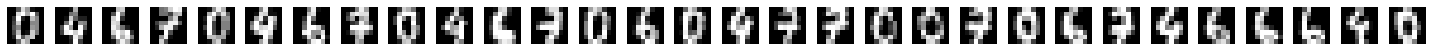

In [84]:
# the dataset contains only some digits of the dataset found at https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
# display some elements of the dataset

fig, axes = plt.subplots(nrows = 1, ncols = 30,figsize=(20,3))
for j, ax in enumerate(axes.ravel()):
  ax.matshow(digits.images[indices][j], cmap=plt.cm.binary)
  ax.axis('off')
fig.tight_layout()
plt.show()

In [85]:
# choose values for KERNEL_BANDWIDTH and RIPS_SCALE and plot the persistence diagram

# choose a reasonable value for PERSISTENCE_THRESHOLD by looking at persistence diagram

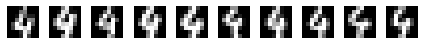

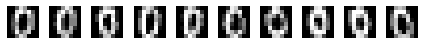

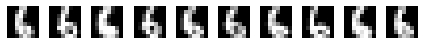

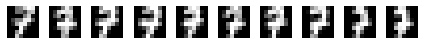

In [79]:
# if your output clustering is in the variable c, you can use the following code to print 10 images in each cluster
# use this to make sure that the clustering you are producing is reasonable!

N = 10

n_clusters = max(c)
for i in range(n_clusters+1) :
  indices_i = np.where(c==i)[0]
  fig, axes = plt.subplots(nrows = 1, ncols = N)
  for j, ax in enumerate(axes.ravel()):
    ax.matshow(digits.images[indices][indices_i[j]], cmap=plt.cm.binary)
    ax.axis('off')
  fig.tight_layout()
  plt.show()